<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Управляющий-музеями." data-toc-modified-id="Управляющий-музеями.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Управляющий музеями.</a></span></li><li><span><a href="#Создание-игры." data-toc-modified-id="Создание-игры.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание игры.</a></span></li><li><span><a href="#Сладости-в-данных." data-toc-modified-id="Сладости-в-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сладости в данных.</a></span></li><li><span><a href="#Знаменитые-Ирисы." data-toc-modified-id="Знаменитые-Ирисы.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Знаменитые Ирисы.</a></span></li></ul></div>

**HomeTask**

**Лекция 7. Визуализация на Python**

Выполните задания используя данный Notebook.ipynb. Домашнее задание предоставляется вместе с набором учебных датасетов. 
Перед началом, пожалуйста, убедитесь, что все необходимые датасеты находятся в одной папке с данным Notebook.

Следуйте поэтапно (по параграфам) данного ноутбука и заполняйте пропуски необходимым кодом для визуализации, чтобы ответить на соответствующие вопросы:
- `<your code here>` - для реализации кода (убедитесь, что код выполняется без ошибок)  
- `<your answer>` - для текстового ответа

Пожалуйста, **продублируйте ответы кратко в форме на my.tinkoff.ru/edu** - это позволит быстрее проверить вашу работу. Также **прикрепите код вашего ноутбука в формате .py** - в случае вопросов, преподаватель сможет детально посмотреть ваш код.

### Управляющий музеями. 

В вашем распоряжении данные о посещении 4 музеев. Для внеочереднего заседания, вам необходимо предоставить отчёт и ответить на следующие вопросы:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# загрузка данных для task № 1. Посмотрим на данные

museum_visitors = pd.read_csv('museum_visitors.csv', sep = ',')
museum_visitors.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [11]:
# 1. В октябре 2018 года на сколько посетителей больше посетило Avila Adobe, чем Firehouse Museum?

october_2018 = museum_visitors[museum_visitors['Date'] == "2018-10-01"]
avila_october_2018 = october_2018["Avila Adobe"].values[0]
firehouse_october_2018 = october_2018["Firehouse Museum"].values[0]

difference = avila_october_2018 - firehouse_october_2018
print(f"Difference: {difference}")

Difference: 14658


1. В октябре 2018 года на сколько посетителей больше посетило Avila Adobe, чем Firehouse Museum?

**Ответ:** 14658

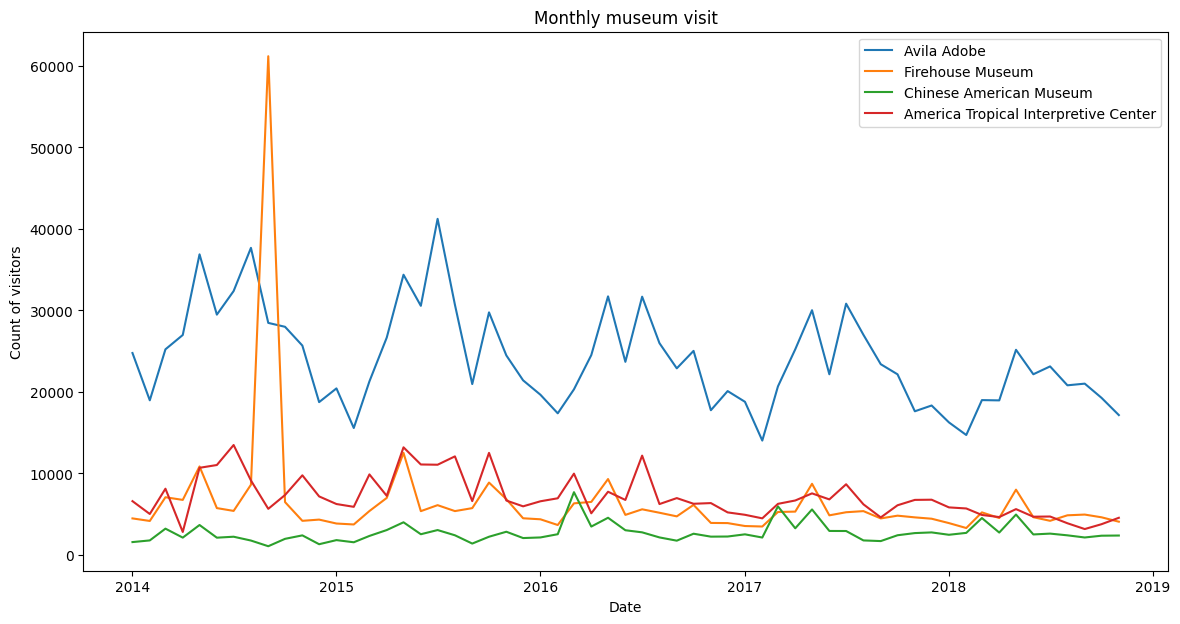

In [12]:
# Некий музей утверждает, что в 2014 году они провели мероприятие, 
# которое привлекло невероятное количество посетителей, и что им следует получить дополнительный бюджет 
# для проведения подобного мероприятия снова. 

# Другие музеи считают, что такие мероприятия не так уж важны, и бюджеты должны быть разделены исключительно 
# на основе недавних посетителей в среднем за месяц.

# Чтобы показать, как мероприятие соотносится с обычным трафиком в каждом музее, создайте необходимую диаграмму (какую?), 
# которая показывает, как количество посетителей каждого музея менялось с течением времени. 

museum_visitors["Date"] = pd.to_datetime(museum_visitors["Date"])
museums = ['Avila Adobe', 'Firehouse Museum',
           'Chinese American Museum', 'America Tropical Interpretive Center']

plt.figure(figsize=(14,7))

for museum in museums:
    sns.lineplot(data = museum_visitors, x = "Date",
                 y = museum, label = museum)

plt.title("Monthly museum visit")
plt.xlabel("Date")
plt.ylabel("Count of visitors")
plt.legend()
plt.show()

2. Какой график вы выберете для визуализации ежемесячного трафика музеев?

**Ответ:** отпимально будет линейный график

3. Исходя из этого графика, какой музей проводил мероприятие по привлечению посетителей?

**Ответ:** Firehouse Museum

4. Исходя из этого графика, какой музей обладает выраженной сезонностью посещения?

**Ответ:** Avila Adobe

### Создание игры. 

Ваши друзья решили создать свою собственную видеоигру! Вы - как аналитик данных, решили помочь ребятам. IGN Game Reviews собирает данные обо всех последних игровых релизах, а также о рейтинге, который они получили от экспертов, от 0 (катастрофа) до 10 (шедевр).

Вы решили использовать обзоры IGN для рекомендации дизайна будущей игры. К счастью, рейтинг уже обобщён в CSV-файле:

In [20]:
# загрузка данных для task № 2. Посмотрим на данные

ign_data = pd.read_csv('ign_scores.csv', index_col = 'Platform', sep = ',')
ign_data.head()

pc_ratings = ign_data.loc['PC']
max_rating = pc_ratings.max()
max_genre = pc_ratings.idxmax()

print(f"Max rating: {max_rating:.2f}, genre: {max_genre}")

Max rating: 7.76, genre: RPG


1. Какую самую высокую среднюю оценку получили игры для ПК (для любого жанра)?

**Ответ:** 7.76

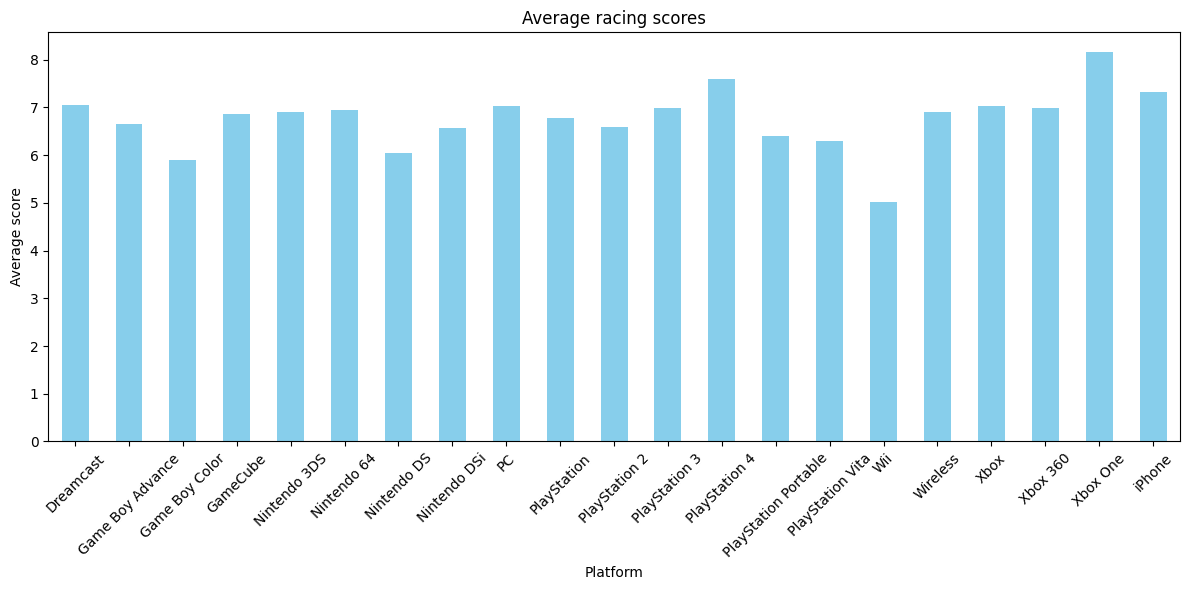

In [25]:
# Гоночная игра Mario Kart Wii, выпущенная для платформы Wii в 2008 году - отличная игра
# Её рейтинг составляет колоссальные 8,9! Вдохновленные успехом этой игры, вы подумываете о собственной гоночной игре
# для платформы Wii.

# Создайте столбчатую диаграмму (barplot), которая показывает средний балл гоночных игр для каждой платформы. 
# Ваша диаграмма должна иметь по одному столбцу для каждой платформы.

racing_scores = ign_data['Racing']

plt.figure(figsize=(12,6))
racing_scores.plot(kind='bar', color="skyblue")
plt.title("Average racing scores")
plt.xlabel("Platform")
plt.ylabel("Average score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. На основе столбчатой диаграммы, ожидаете ли вы, что гоночная игра для платформы Wii получит высокий рейтинг? Если нет, то какая игровая платформа кажется лучшей альтернативой?

**Ответ:** судя по диаграмме, подойдет Xbox One, на Wii низкий рейтинг

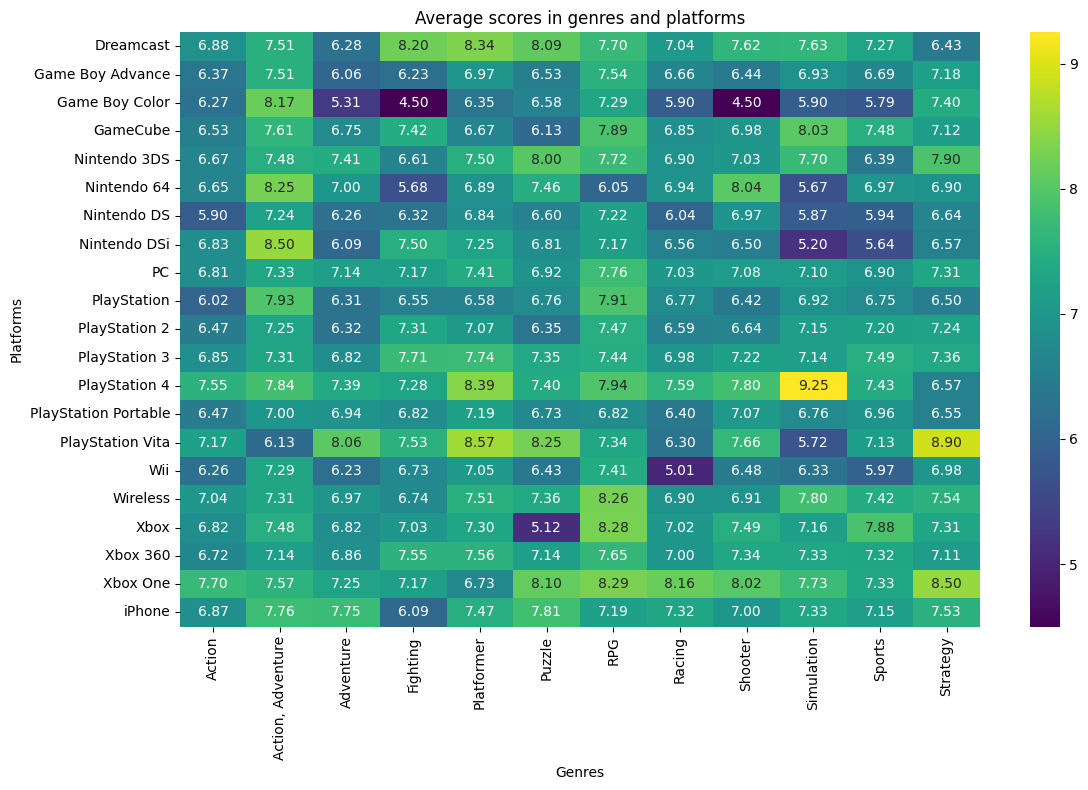

Max score: 9.25 for genre: Simulation for platform: PlayStation 4
Min score: 4.50 for genre: Fighting for platform: Game Boy Color


In [32]:
# В конце концов, вы решаете не создавать гоночную игру для Wii
# Вы решаете использовать всевозможные данные IGN, чтобы определиться с новым выбором жанра и платформы.

# Используйте данные для создания тепловой карты среднего балла по жанру и платформе. (для sns.heatmap исп. доп. annot = True)

plt.figure(figsize=(12,8))
sns.heatmap(ign_data, annot=True, fmt=".2f", cmap="viridis")
plt.title("Average scores in genres and platforms")
plt.xlabel("Genres")
plt.ylabel("Platforms")
plt.tight_layout()
plt.show()

scores_series = ign_data.unstack()

max_combo = scores_series.idxmax()
max_value = scores_series.max()
print(f"Max score: {max_value:.2f} for genre: {max_combo[0]} for platform: {max_combo[1]}")

min_combo = scores_series.idxmin()
min_value = scores_series.min()
print(f"Min score: {min_value:.2f} for genre: {min_combo[0]} for platform: {min_combo[1]}")

3. Какая комбинация жанра и платформы получает самые высокие средние оценки?

**Ответ:** это Simulation в PlayStation 4

4. А какая комбинация получает самые низкие средние оценки?

**Ответ:** Fighting в Game Boy Color

### Сладости в данных.

Вы работаете на крупного производителя сладостей, и ваша цель — написать отчет, который ваша компания может использовать для разработки своего следующего продукта. Вскоре после начала исследования вы натыкаетесь на этот очень интересный набор данных, содержащий результаты опроса по потреблению любимых сладостей.

In [34]:
# загрузка данных для task № 3. Посмотрим на данные
candy_data = pd.read_csv('candy.csv', index_col = 'id', sep = ',')
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


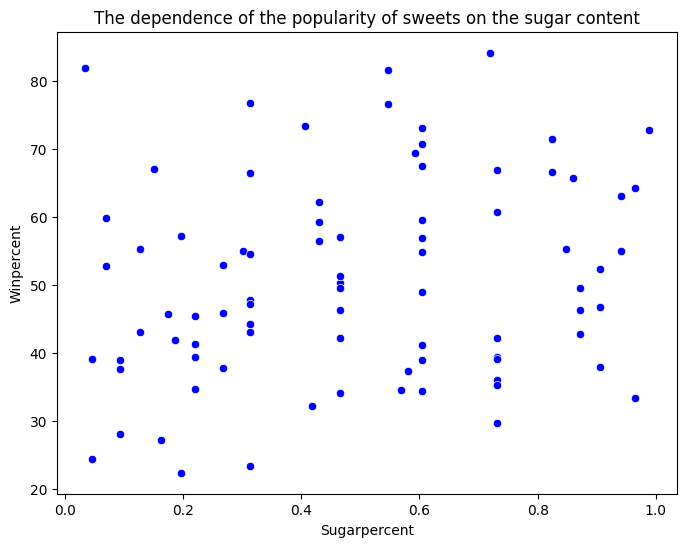

In [35]:
# Чем больше сахара - тем вкуснее?

# Создайте диаграмму рассеяния (scatter plot), которая показывает связь между «sugarpercent» (на горизонтальной оси x)
# и «winpercent» (на вертикальной оси y).

plt.figure(figsize=(8,6))
sns.scatterplot(data = candy_data, x='sugarpercent',
                y = 'winpercent', color = 'blue')
plt.title("The dependence of the popularity of sweets on the sugar content")
plt.xlabel("Sugarpercent")
plt.ylabel("Winpercent")
plt.show()

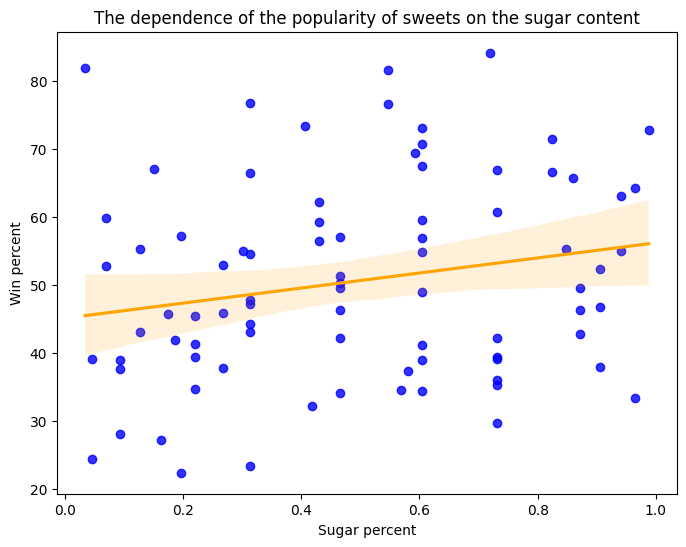

In [37]:
# Похоже, что только диаграммы рассеяния недостаточно, давайте построим её с линией регресси (regplot).
# Согласно графику который вы получите, есть ли небольшая корреляция между 'winpercent' и 'sugarpercent'? 
# Что это говорит вам о конфетах, которые люди предпочитают?

plt.figure(figsize=(8,6))
sns.regplot(data = candy_data, x='sugarpercent', y = 'winpercent',
            scatter_kws={'color': 'blue'}, line_kws={'color': 'orange'})
plt.title("The dependence of the popularity of sweets on the sugar content")
plt.xlabel("Sugar percent")
plt.ylabel("Win percent")
plt.show()

1. Ответьте в свободном формате, на основании построенных графиков: **есть ли какая-то связь между предпочтениями покупателей и количеством сахара в сладостях?**

**Ответ:** линия регрессии имеет небольшой положительный наклон. Это означает, что чем больше сахара, тем чуть выше процент голосов за вкус конфеты, то есть он не определяется только содержанием сахара (выбор конфет зависит и от других факторов, например, аромат).

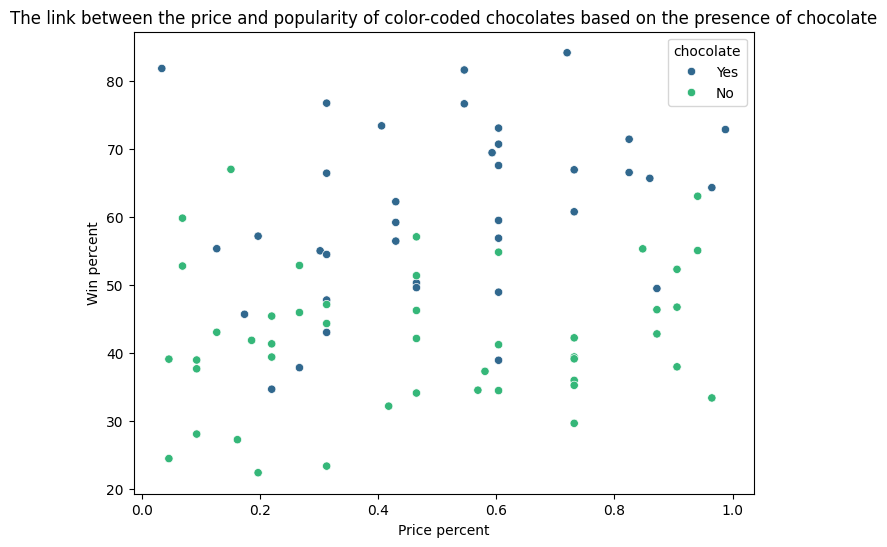

In [38]:
# Ниже создайте диаграмму рассеяния, чтобы показать связь между «pricepercent» (на горизонтальной оси x) 
# и «winpercent» (на вертикальной оси y). Используйте столбец «chocolate» для цветовой кодировки точек.

plt.figure(figsize=(8,6))
sns.scatterplot(data = candy_data, x='sugarpercent', y = 'winpercent',
            hue = "chocolate", palette = "viridis")
plt.title("The link between the price and popularity of color-coded chocolates based on the presence of chocolate")
plt.xlabel("Price percent")
plt.ylabel("Win percent")
plt.show()

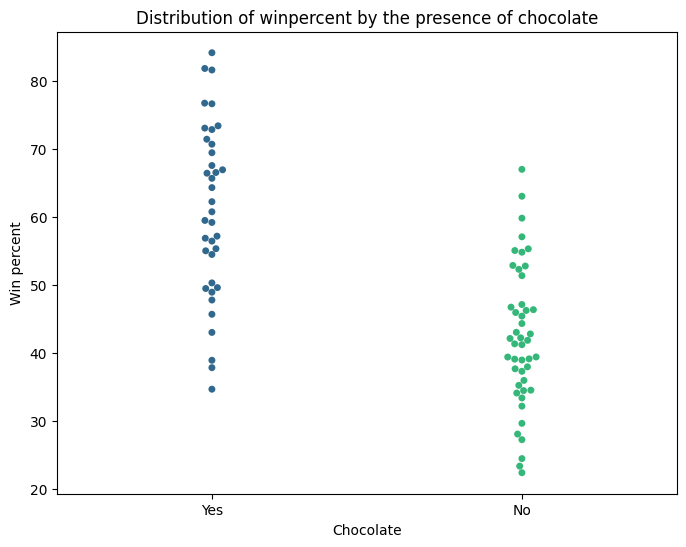

In [39]:
# Теперь давайте построим категориальную диаграмму рассеяния (график роя - swarmplot), 
# чтобы подчеркнуть связь между «chocolate» и «winpercent». 
# Поместите «chocolate» на (горизонтальную) ось x, а «winpercent» на (вертикальную) ось y.

plt.figure(figsize=(8,6))
sns.swarmplot(data = candy_data, x='chocolate', y = 'winpercent',
            hue = "chocolate", palette = "viridis")
plt.title("Distribution of winpercent by the presence of chocolate")
plt.xlabel("Chocolate")
plt.ylabel("Win percent")
plt.show()

2. Ответьте в свободном формате, на основании построенных графиков: **Как наличие шоколада влияет на предпочтения покупателей? Какой график лучше характеризует это: swarmplot или scatter plot?**

**Ответ:** более информативным будет swarmplot, так как он сравнивает две категории (шоколад/не шоколад) по показателю популярности. Судя по графикам, можно сказать, что конфеты с шоколадом имеют большой показатель winpercent, чем без шоколада.

### Знаменитые Ирисы.

В набор представленных датасетов содержится показательный набор данных о замерах геометрических размеров Ирисов различных видов:
- Iris setosa
- Iris versicolor
- Iris virginica

Найдите датасет iris.csv и импортируйте для анализа в dataframe. Используйте любые графики для визуализации, чтобы ответить на вопрос:

- *Какой вид Ирисов можно определить (отделить от других видов) используя всего лишь один параметр? (и какой параметр)*

   Id  Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  \
0   1                5.1               3.5                1.4   
1   2                4.9               3.0                1.4   
2   3                4.7               3.2                1.3   
3   4                4.6               3.1                1.5   
4   5                5.0               3.6                1.4   

   Petal Width (cm)      Species  
0               0.2  Iris-setosa  
1               0.2  Iris-setosa  
2               0.2  Iris-setosa  
3               0.2  Iris-setosa  
4               0.2  Iris-setosa  


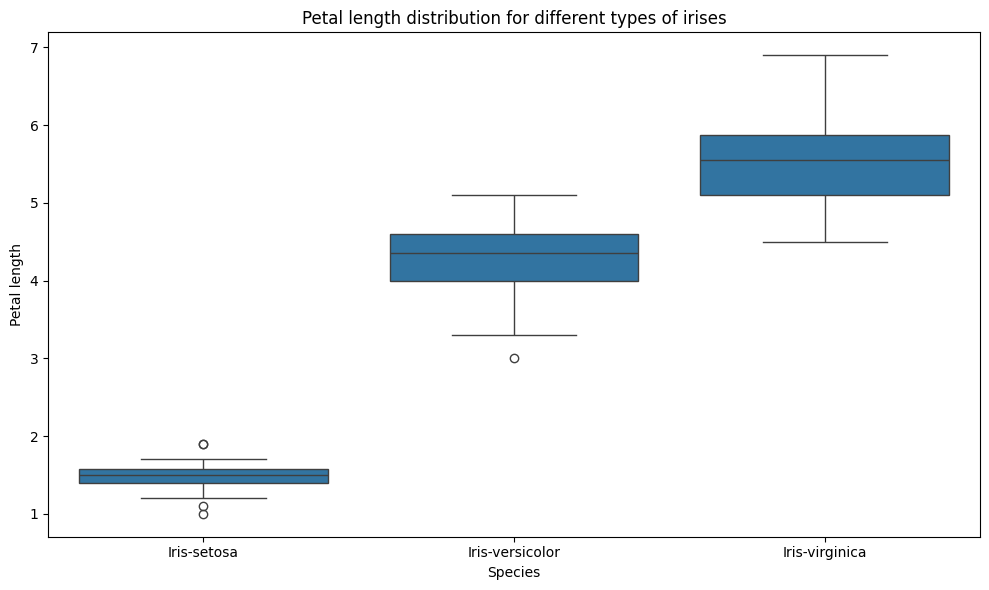

In [47]:
iris = pd.read_csv('iris.csv')
print(iris.head())

plt.figure(figsize=(10,6))
sns.boxplot(data = iris, x = 'Species', y = 'Petal Length (cm)',)
plt.title('Petal length distribution for different types of irises')
plt.xlabel('Species')
plt.ylabel('Petal length')
plt.tight_layout()
plt.show()

# С помощью параметра Petal Length (cm) можно отделить iris-setosa от других видов